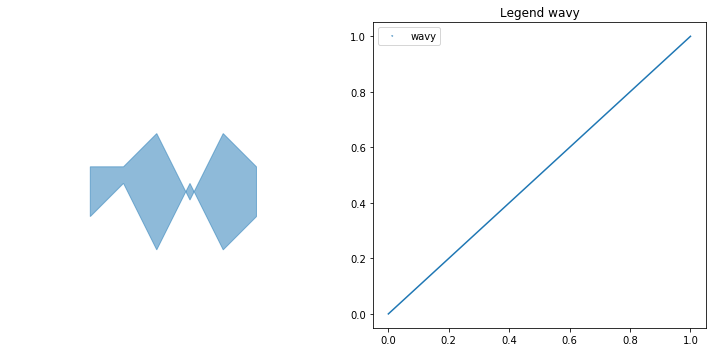

In [3]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerBase
import matplotlib.transforms as transforms

# 自定义 Handler，用于在 legend 中正确显示波折图形
class HandlerWavy(HandlerBase):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        patch = mpatches.PathPatch(orig_handle.get_path(),
                                    facecolor=orig_handle.get_facecolor(),
                                    edgecolor=orig_handle.get_edgecolor(),
                                    lw=orig_handle.get_linewidth(),
                                    alpha=orig_handle.get_alpha())
        # 获取原始路径的边界，并计算中心点
        bbox = orig_handle.get_path().get_extents()
        path_center = ((bbox.x0 + bbox.x1) / 2, (bbox.y0 + bbox.y1) / 2)
        # 计算 legend 区域的中心位置
        center_x = xdescent + width / 2.0
        center_y = ydescent + height / 2.0
        # 平移使得路径居中显示
        translation = transforms.Affine2D().translate(center_x - path_center[0],
                                                      center_y - path_center[1])
        patch.set_transform(translation + trans)
        return [patch]

# 定义一个波折图形（锯齿状的波形）
Path = mpath.Path
vertices = [
    (0.0, 0.5),   # 左侧中点
    (0.2, 0.7),   # 上升
    (0.4, 0.3),   # 下降
    (0.6, 0.7),   # 上升
    (0.8, 0.3),   # 下降
    (1.0, 0.5),   # 右侧中点
    (1.0, 0.8),   # 向右上延伸
    (0.8, 1.0),   # 左转
    (0.6, 0.6),   # 下降
    (0.4, 1.0),   # 上升
    (0.2, 0.8),   # 左转
    (0.0, 0.8),   # 左侧上方
    (0.0, 0.5)    # 回到起点闭合
]
# 用 LINETO 构造所有边，最后一个点用 CLOSEPOLY
codes = [Path.MOVETO] + [Path.LINETO]*(len(vertices)-2) + [Path.CLOSEPOLY]
wavy_path = Path(vertices, codes)

# 设置波折图形的颜色和透明度
wavy_color = '#1f77b4'
wavy_patch = mpatches.PathPatch(wavy_path,
                                facecolor=wavy_color,
                                edgecolor=wavy_color,
                                alpha=0.5)

# 创建图形和两个子图
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 子图1：直接绘制波折图形
axs[0].add_patch(wavy_patch)
axs[0].set_title("")
axs[0].set_xlim(-0.5, 1.5)
axs[0].set_ylim(0, 1.5)
axs[0].set_aspect('equal')
axs[0].axis('off')  # 去除坐标轴

# 子图2：利用 legend 显示波折图形
# 绘制一条虚拟的线，主要用于 legend 显示
axs[1].plot([0, 1], [0, 1], label="")
# 把波折图形作为 legend handle，并使用自定义的 HandlerWavy
axs[1].legend([wavy_patch], ['wavy'],
              handler_map={mpatches.PathPatch: HandlerWavy()},
              loc='upper left')
axs[1].set_title("Legend wavy")

plt.tight_layout()
plt.show()

# legend

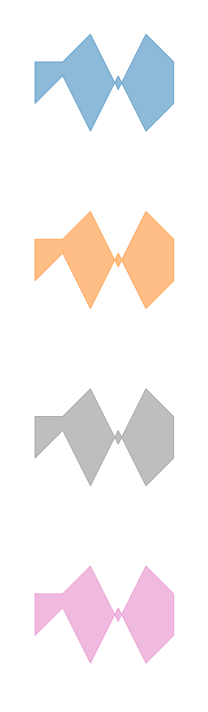

In [4]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import matplotlib.patches as mpatches

# 定义一个波折图形（锯齿状波形）的顶点和指令
Path = mpath.Path
vertices = [
    (0.0, 0.5),
    (0.2, 0.7),
    (0.4, 0.3),
    (0.6, 0.7),
    (0.8, 0.3),
    (1.0, 0.5),
    (1.0, 0.8),
    (0.8, 1.0),
    (0.6, 0.6),
    (0.4, 1.0),
    (0.2, 0.8),
    (0.0, 0.8),
    (0.0, 0.5)  # 闭合图形
]
codes = [Path.MOVETO] + [Path.LINETO]*(len(vertices)-2) + [Path.CLOSEPOLY]
wavy_path = Path(vertices, codes)

# 定义四种颜色
obs_season_color = '#1f77b4'
mod_season_color = '#ff7f0e'
obs_diurnal_color = '#7f7f7f'
mod_diurnal_color = '#e377c2'

colors = [obs_season_color, mod_season_color, obs_diurnal_color, mod_diurnal_color]

# 为每种颜色生成一个 PathPatch
patches = []
for col in colors:
    patch = mpatches.PathPatch(wavy_path, facecolor=col, edgecolor=col, alpha=0.5)
    patches.append(patch)

# 创建图形，将四个图形排列成一列
fig, axs = plt.subplots(4, 1, figsize=(4, 10))
for ax, patch in zip(axs, patches):
    ax.add_patch(patch)
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 1.2)
    ax.set_aspect('equal')
    ax.axis('off')  # 不显示坐标轴

plt.tight_layout()
plt.show()


In [5]:
clear all